In [1]:
# import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [2]:
from tensorflow.python.client import device_lib 
print(device_lib.list_local_devices())

2023-11-16 19:15:35.204567: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-16 19:15:35.231110: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-16 19:15:35.231128: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-16 19:15:35.231153: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-16 19:15:35.238318: I tensorflow/core/platform/cpu_feature_g

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 4360098046288728921
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5555355648
locality {
  bus_id: 1
  links {
  }
}
incarnation: 17479718369898417042
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 4070 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9"
xla_global_id: 416903419
]


2023-11-16 19:15:36.342388: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-16 19:15:36.345649: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-16 19:15:36.345667: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-16 19:15:36.795072: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-16 19:15:36.795099: I tensorflow/compile

In [3]:
os.chdir("/mnt/")

NameError: name 'os' is not defined

In [15]:
rm -rf Data

In [16]:
!git clone https://github.com/Annaantonin/Data.git

Cloning into 'Data'...
remote: Enumerating objects: 21, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 21 (delta 4), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (21/21), 456.69 KiB | 7.03 MiB/s, done.
Resolving deltas: 100% (4/4), done.


In [17]:
import Data as data

In [4]:
!git clone https://github.com/Crunch-UQ4MI/neuraluq.git
#!git clone https://github.com/Annaantonin/Data.git
!pip install tensorflow-probability
!pip install scipy
import os
os.chdir("/tf/neuraluq/")
!python setup.py install

fatal: destination path 'neuraluq' already exists and is not an empty directory.

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python3 -m pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python3 -m pip install --upgrade pip
/usr/local/lib/python3.11/dist-packages/setuptools/dist.py:314: InformationOnly: Normalizing 'v0.1.0-beta' to '0.1.0b0'
  self.metadata.version = self._normalize_version(
running install
/usr/local/lib/python3.11/dist-packages/setuptools/_distutils/cmd.py:66: SetuptoolsDeprecationWarning: setup.py install is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` directly.
        Instead, use pypa/build, pypa/installer or other
        standards-based tools.

        See https://blog.ganssle.io/articles/2021/10/setup-py-deprecated.html for details.
        ****************

In [5]:
os.listdir(".")

['dataset',
 'README.md',
 'dist',
 'build',
 'output.mat',
 'examples',
 'NeuralUQ.egg-info',
 'output_ukF.mat',
 '.git',
 'setup.py',
 'Data',
 'neuraluq']

In [19]:
import neuraluq as neuq
import neuraluq.variables as neuq_vars
from neuraluq.config import tf

import numpy as np
import scipy.io as sio
from scipy.io import loadmat

import matplotlib.pyplot as plt

In [30]:
# -*- coding: utf-8 -*-
"""
Created on Wed Oct  4 16:14:30 2023

@author: Antonina
"""

#%%
# Simulated SDOF with:
# % SDOF System Parameters
# m = 5.0;       % Mass (kg)
# k = 10.0;     % Stiffness (N/m)
# c = 0.22;      % Damping coefficient (Ns/m)
# dt=0.001

def load_data(noise_x, noise_f):

    #data = sio.loadmat(r"G:\My Drive\Python_codes\NNs\sdof_ymeas.mat")
    data = sio.loadmat("Data/linear_3dof.mat")
    #  t_x_train, t_f_train = data["t"], data["ymeas"]
    # data = matdata['data']
    t_train , x_tt_train=data["t"], data["Y"]
    x_train, f_train = data["u"], data["F"]
    # train_x_tt = t_x_tt_train, x_train
    # train_f = t_f_train, f_train

    return  x_tt_train.T, t_train.T, x_train.T, f_train.T

#m=1
# [0][..., 0:1]     
def pde_fn(t, process_x, process_f, log_k1, log_k2, log_k3):
 
    M=1.05*np.eye(3,3)
    N=1000
    c1=0.25;
    c2=0.5;
    c3=0.75;
    C=[[c1+c2, -c2, 0], 
        [-c2, c2+c3, -c3],
        [0, -c3, c3]]
    # k1=9; k2=11; k3=13;
  
    k1=tf.exp(log_k1)*9
    k2=tf.exp(log_k2)*11
    k3=tf.exp(log_k3)*13
    K=[[k1+k2,-k2,0],
        [-k2, k2+k3,-k3],
        [0,-k3, k3]]
    U_est=ft.zeros((N,3))
    U_est[:,2]=process_f
    x[:,2]=process_x

    A = tf.constant(np.eye(A_ct.shape[0]) + dt * A_ct, dtype=tf.float32)
    B = tf.constant(dt * B_ct, dtype=tf.float32)
    C = tf.constant(C_ct, dtype=tf.float32)
    D = tf.constant(D_ct, dtype=tf.float32)


    
    K=tf.multiply(K, 1000)
    umn_a[:] = U_est- K*x-C*vel
      
     
    
    
    sys = sl.StateSpace(A, B, Cc, D)
    T, v, xout = sl.lsim(sys, U_est, t)
    
    v=xout[:,3:6]# Velocity
    x=xout[:,0:3]# Displacement
    
    x_tt=np.zeros((N,3))
    f = tf.multiply(x_tt, 5.0)+ tf.exp(log_c) * x_t + tf.exp(log_k) * x
    x_tt[:] = np.linalg.inv(M) @ ( U_est[:]-K @ x[:].T - C @ v[:].T )
        
    return x_tt[:,2]

# def pde_fn(t, x, f, log_c, log_k):

#     # log_k=tf.clip(np.log(3),np.log(20)) # to make constrains for the parameters
#     x_t = tf.gradients(x, t)     # velocity automatic differentiation                                                                                                                                                                                                                        
#     # x_tt = tf.gradients(x_t, t)

#     # x_tt=f - tf.multiply(x_tt, 5.0)+ tf.exp(log_c) * x_t + tf.exp(log_k) * x
#     x_tt=(f - (tf.exp(log_c) * x_t + tf.exp(log_k) * x))
#     # return [f,x_tt]
#     return tf.multiply(x_tt, 0.20)

def pde_xtt(t,x):
    x_t = tf.gradients(x, t)                                                                                                                                                                                                                        
    x_tt = tf.gradients(x_t, t)
    
    return x_tt
    

@neuq.utils.timer
def Trainable(
    x_tt_train, t_train, x_train, f_train, noise, layers, 
):
    # build processes
    process_f = neuq.process.Process(
         surrogate=neuq.surrogates.FNN(layers=layers),
        # surrogate=neuq.surrogates.FNN(layers=layers,activation=RELu),
        posterior=neuq_vars.fnn.Trainable(layers=layers),# displacement
    )
    process_x = neuq.process.Process(
        surrogate=neuq.surrogates.FNN(layers=layers),
        # surrogate=neuq.surrogates.FNN(layers=layers,activation=RELu),
        posterior=neuq_vars.fnn.Trainable(layers=layers),# predicted displacement
    )
    process_log_k1 = neuq.process.Process(
        surrogate=neuq.surrogates.Identity(),
        posterior=neuq_vars.const.Trainable(value=0),
    )
    process_log_k2 = neuq.process.Process(
        surrogate=neuq.surrogates.Identity(),
        posterior=neuq_vars.const.Trainable(value=0),
    )
    process_log_k3 = neuq.process.Process(
        surrogate=neuq.surrogates.Identity(),
        posterior=neuq_vars.const.Trainable(value=0),
    )
    
    method = neuq.inferences.DEns(
        num_samples=1, num_iterations=10000, optimizer=tf.train.AdamOptimizer(5*1e-4),
    )

    # build losses
    loss_x = neuq.likelihoods.MSE(
        inputs=t_train,
        targets=x_tt_train[:,2], 
        processes=[process_x],
        pde=pde_xtt, # dotdot _X
        multiplier=1.0,
    )
    
    loss_f = neuq.likelihoods.MSE(
        inputs=t_train,
        targets=x_tt_train[:,2], # f_train  CHANGE!!!!
        processes=[process_x, process_f, process_log_k1, process_log_k2, process_log_k3], # tf train
        pde=pde_fn,
        multiplier=1.0,
    )
    # build model
    model = neuq.models.Model(
        processes=[process_x, process_f, process_log_k1, process_log_k2, process_log_k3],
        likelihoods=[loss_x, loss_f],
    )
    # assign and compile method
    model.compile(method)
    # obtain posterior samples
    samples = model.run()

    processes = [process_x, process_f, process_log_k1, process_log_k2, process_k3]
    return processes, samples, model


if __name__ == "__main__":

    noise = 0.01

    x_tt_train, t_train, x_train, f_train = load_data(noise, noise)

    # t_x_tt_train, x_tt_train = train_x_tt
    # t_f_train, f_train = train_f

    layers = [3, 64,64, 3]

    processes, samples, model = Trainable(
        x_tt_train, t_train, x_train, f_train, noise, layers,
    )

    x_pred, f_pred, logk1_pred, logk2_pred, logk3_pred = model.predict(t_train, samples, processes, pde_fn=None)


Supporting backend tensorflow.compat.v1

Compiling a Ensemble method



ValueError: Dimensions must be equal, but are 1 and 3 for '{{node MatMul_66}} = MatMul[T=DT_FLOAT, transpose_a=false, transpose_b=false](Const_90, MatMul_66/ReadVariableOp)' with input shapes: [1000,1], [3,64].

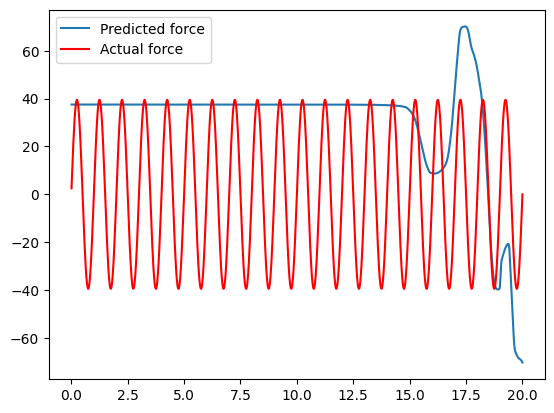

In [61]:
plt.plot(t_train,np.mean(f_pred,axis=(0, 2)),label='Predicted force')
plt.plot(t_train,f_train,'r',label='Actual force')
plt.legend()

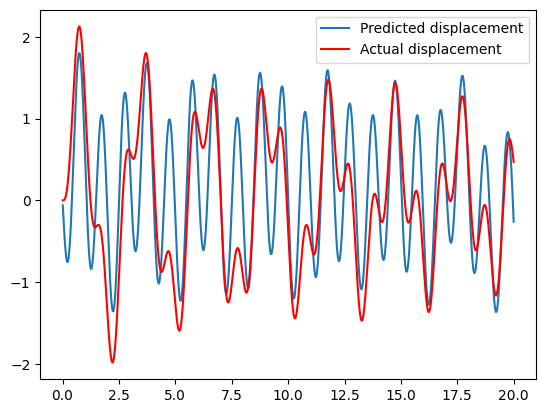

In [57]:
plt.plot(t_train,np.mean(x_pred,axis=(0, 2)),label='Predicted displacement')
plt.plot(t_train,x_train,'r',label='Actual displacement')
plt.legend()

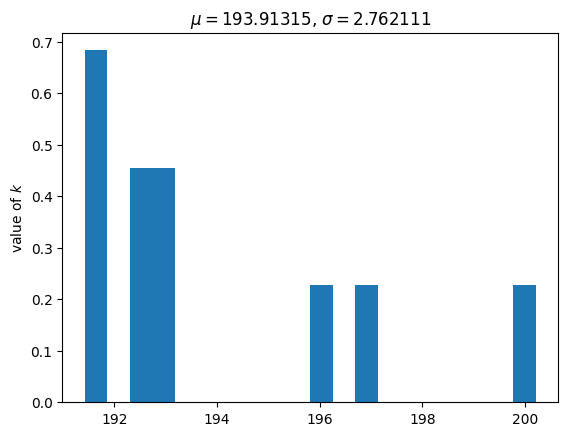

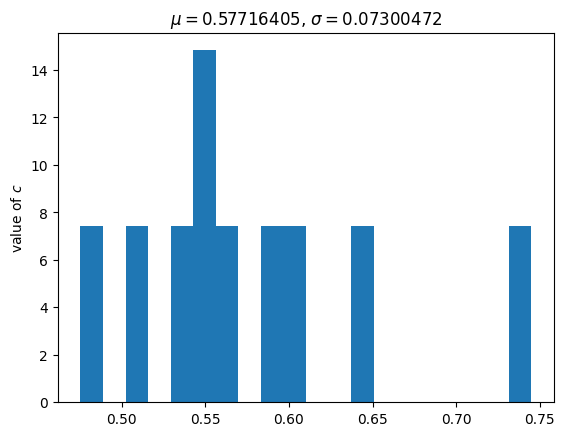

In [58]:
neuq.utils.hist(np.exp(logk_pred).flatten(), name="value of $k$")
neuq.utils.hist(np.exp(logc_pred).flatten(), name="value of $c$")

In [59]:
[a.shape for a in samples]

[(10, 1, 64),
 (10, 64, 64),
 (10, 64, 128),
 (10, 128, 128),
 (10, 128, 64),
 (10, 64, 1),
 (10, 1, 64),
 (10, 1, 64),
 (10, 1, 128),
 (10, 1, 128),
 (10, 1, 64),
 (10, 1, 1),
 (10, 1, 64),
 (10, 64, 64),
 (10, 64, 128),
 (10, 128, 128),
 (10, 128, 64),
 (10, 64, 1),
 (10, 1, 64),
 (10, 1, 64),
 (10, 1, 128),
 (10, 1, 128),
 (10, 1, 64),
 (10, 1, 1),
 (10,),
 (10,)]

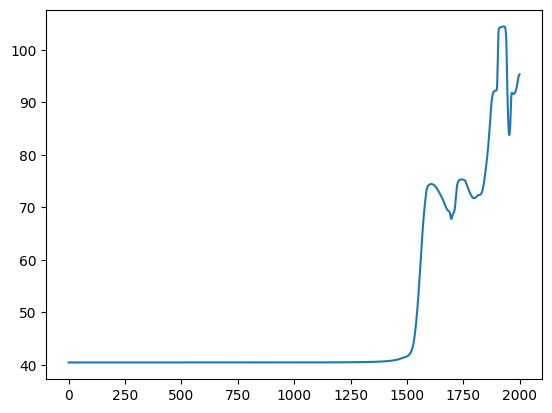

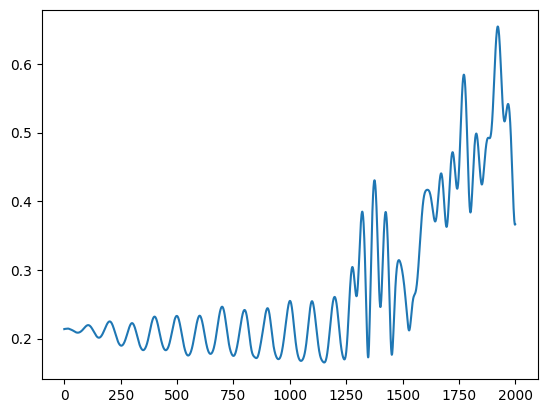

In [60]:
unc_f=np.std(f_pred,axis=0)
plt.plot(unc_f)
plt.figure()
unc_x=np.std(x_pred,axis=0)
plt.plot(unc_x)

In [47]:
Csamp=samples[12]    
Ksamp=samples[13]
C_post=np.exp(np.mean(Csamp))
print("C_true=0.22(Ns/m) and C_post =", C_post) 
K_post=np.exp(np.mean(Ksamp))
print("K_true=10(N/m) and K_post =", K_post) 

C_true=0.22(Ns/m) and C_post = 1.0092605
K_true=10(N/m) and K_post = 1.0010968


In [ ]:
# plt.figure
# plt.plot(aa[:,0,0],'r')

In [ ]:
# sio.savemat("G:/My Drive/Python_codes/sdof0.mat", {"x_pred":x_pred, "k":samples[7].flatten(),"c":samples[6].flatten()})

In [32]:
data_to_save = {
   "x_pred":x_pred, "f_pred":f_pred, "c":samples[12].flatten(),"k":samples[13].flatten()
}
file_name = 'output_ukF.mat'
sio.savemat(file_name, data_to_save)